# Bernstein-Vazirani algorithm

## Import section

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

import numpy as np
from math import pi

from qiskit import *
from qiskit_aer import QasmSimulator, UnitarySimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_runtime import *

### Goal: compute the string $s$ of the parametric function $f_s(x) = x \cdot s$ mod 2

In [2]:
s = '110101'

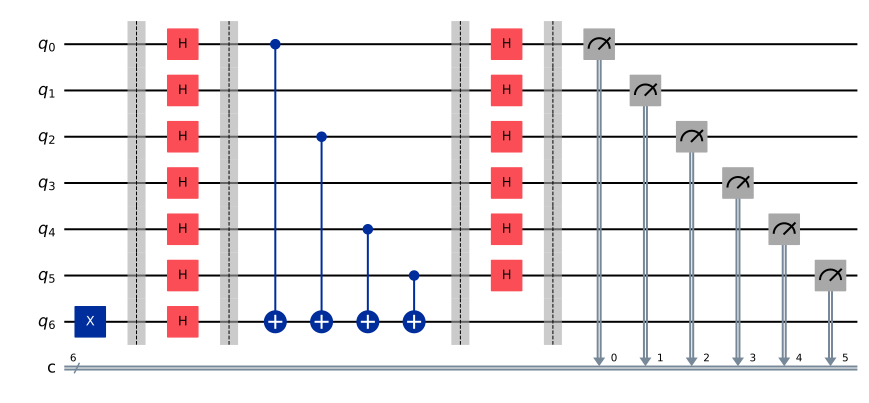

In [14]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n
circuit.barrier() 

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() 

# Step 3
circuit.h(range(n))

circuit.barrier()

circuit.measure(range(n), range(n))

circuit.draw('mpl')

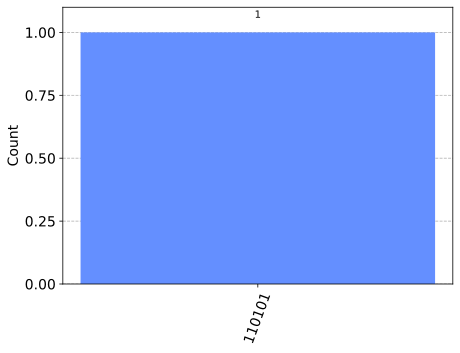

In [15]:
backend = QasmSimulator()
answer = backend.run(circuit.decompose(), shots= 1).result().get_counts()

plot_histogram(answer)